# 학생 성적 예측 

[사용한 데이터셋]  (https://archive.ics.uci.edu/dataset/320/student+performance)
- 랜덤 포레스트 알고리즘 -> 랜덤 포레스트 알고리즘은 특성 중요도를 알아볼 수 있고 회귀 문제를 처리할 수 있기에 선택함

- 학교, 성별, 나이, 가족 구성원의 크기, 부모의 교육 수준, 부모의 직업, 직전학기 성적 등을 기반으로 한 예측

- 최종 결과 정확도: 81%



In [13]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


# 필요한 라이브러리 불러오기


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# URL에서 ZIP 파일 다운로드 및 특정 CSV 파일을 Pandas로 불러오기

In [15]:
import pandas as pd
import zipfile

# ZIP 파일 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
zip_path = "student.zip"

# ZIP 파일 다운로드
import urllib.request
urllib.request.urlretrieve(url, zip_path)

# ZIP 파일 열기 및 특정 파일 읽기
with zipfile.ZipFile(zip_path, 'r') as z:
    # ZIP 파일 내 파일 목록 확인
    print("ZIP 파일 목록:", z.namelist())
    
    # 특정 파일 선택 (여기서는 'student-mat.csv' 선택)
    with z.open('student-mat.csv') as f:
        df = pd.read_csv(f, sep=';')

# 데이터 확인
print(df.head())
print(df.info())



ZIP 파일 목록: ['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<cla

# 범주형 데이터 인코딩 및 학습/테스트 데이터셋 분리
- 범주형 변수를 원-핫 인코딩 방식으로 숫자형 더미 변수로 변환
- 타겟변수 설정 (G3)

In [1]:
# 범주형 데이터를 숫자형으로 변환
df_encoded = pd.get_dummies(df, drop_first=True)

# 주요 학습 목표 컬럼: G3 (최종 성적)
X_with_G2 = df_encoded.drop('G3', axis=1)  # 특성
y = df_encoded['G3']              # 타겟 변수

# 데이터셋 분리
X1_train, X1_test, y_train, y_test = train_test_split(X_with_G2, y, test_size=0.2, random_state=42)


NameError: name 'pd' is not defined

# 모델 생성

In [17]:
# 랜덤포레스트 모델 생성
rf_with_G2 = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_with_G2.fit(X1_train, y_train)

# 예측
y_pred_with_G2 = rf_with_G2.predict(X1_test)


# 모델 성능 평가를 위한 MSE와 R^2 계산

In [18]:
# 평가 지표 계산
mse_with_G2 = mean_squared_error(y_test, y_pred_with_G2)
r2_with_G2 = r2_score(y_test, y_pred_with_G2)

print(f"Mean Squared Error: {mse_with_G2:.2f}")
print(f"R^2 Score: {r2_with_G2:.2f}")


Mean Squared Error: 3.80
R^2 Score: 0.81


# 중요도 추출 및 시각화
- G1, G2(직전 학기의 성적)가 지나치게 높음

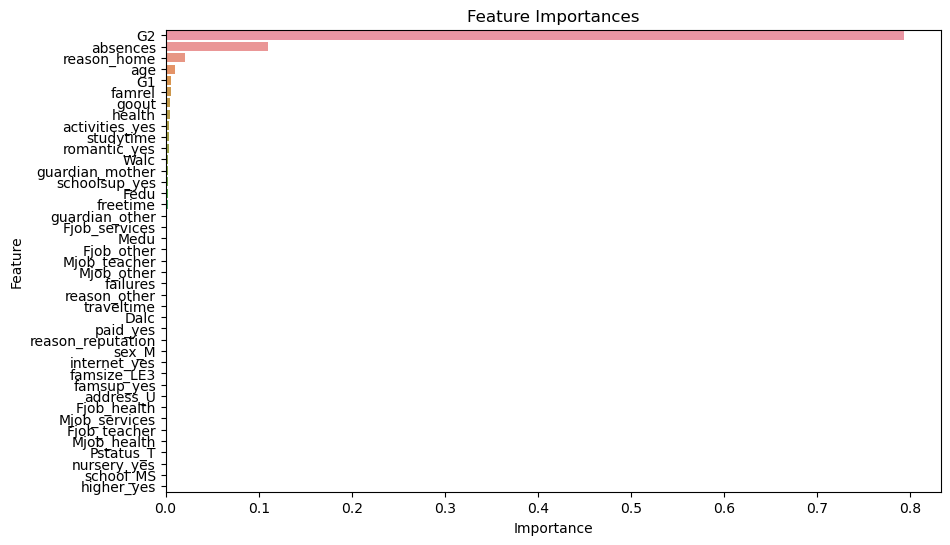

In [19]:
# 특성 중요도 추출
feature_importances_with_G2 = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': rf_with_G2.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 중요도 막대 그래프(시각화1)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_with_G2)
plt.title("Feature Importances")
plt.show()


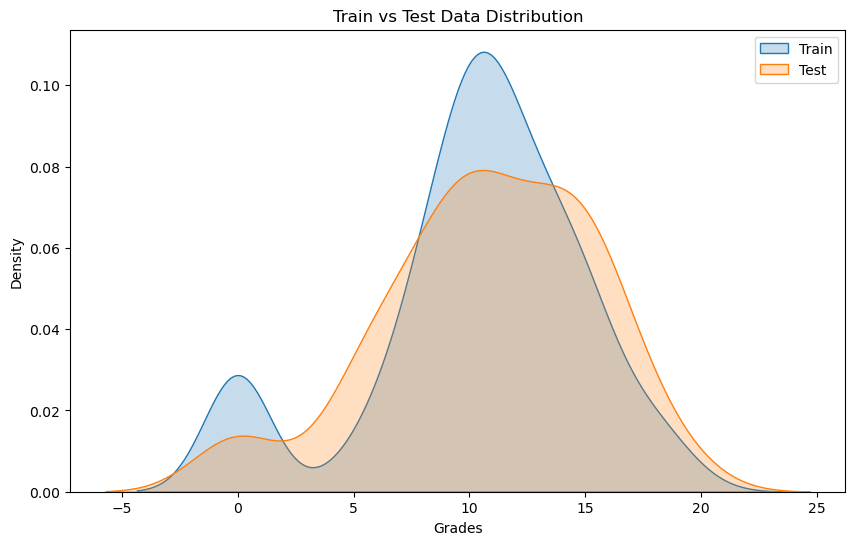

In [20]:
# 학습 및 테스트 데이터 분포 확인 (시각화 6)
plt.figure(figsize=(10, 6))
sns.kdeplot(y_train, label='Train', fill=True)
sns.kdeplot(y_test, label='Test', fill=True)

plt.title('Train vs Test Data Distribution')
plt.xlabel('Grades')
plt.ylabel('Density')
plt.legend()
plt.show()

# 상관관계 히트맵

C:\Users\gram\AppData\Local\Temp\ipykernel_5676\2681535957.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


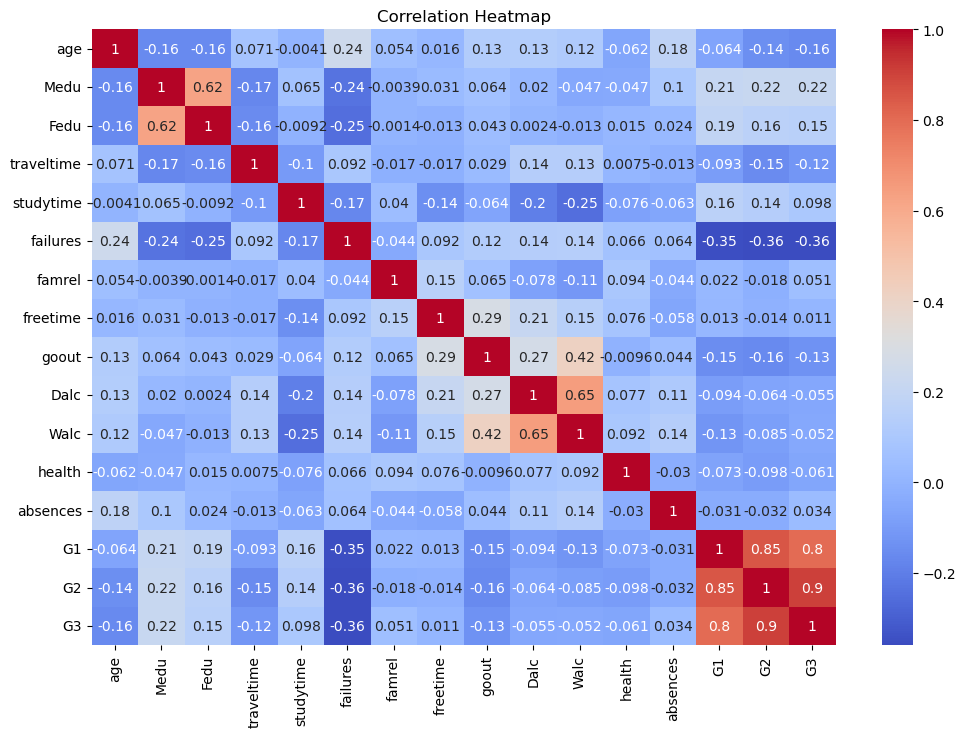

In [21]:
# 상관관계 히트맵
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# G1, G2 특성 제외 

- G1, G2 특성 제외 후 데이터셋 분리

In [22]:
X_without_G2 = df_encoded.drop(['G1', 'G2', 'G3'], axis=1)  # G2와 G3를 제외한 변수

# 데이터셋 분리
X2_train, X2_test, y_train, y_test = train_test_split(
    X_without_G2, y, test_size=0.2, random_state=42)

# 모델 생성

In [23]:
# 랜덤포레스트 모델 생성
rf_without_G2 = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_without_G2.fit(X2_train, y_train)

# 예측
y_pred_without_G2 = rf_without_G2.predict(X2_test)

# 모델 성능 평가를 위한 MSE와 R^2 계산

In [24]:
# 평가 지표 계산
mse_without_G2 = mean_squared_error(y_test, y_pred_without_G2)
r2_without_G2 = r2_score(y_test, y_pred_without_G2)

print(f"Model without G2 - Mean Squared Error: {mse_without_G2:.2f}")
print(f"Model without G2 - R^2 Score: {r2_without_G2:.2f}")

Model without G2 - Mean Squared Error: 15.49
Model without G2 - R^2 Score: 0.24


# 중요도 추출 및 시각화

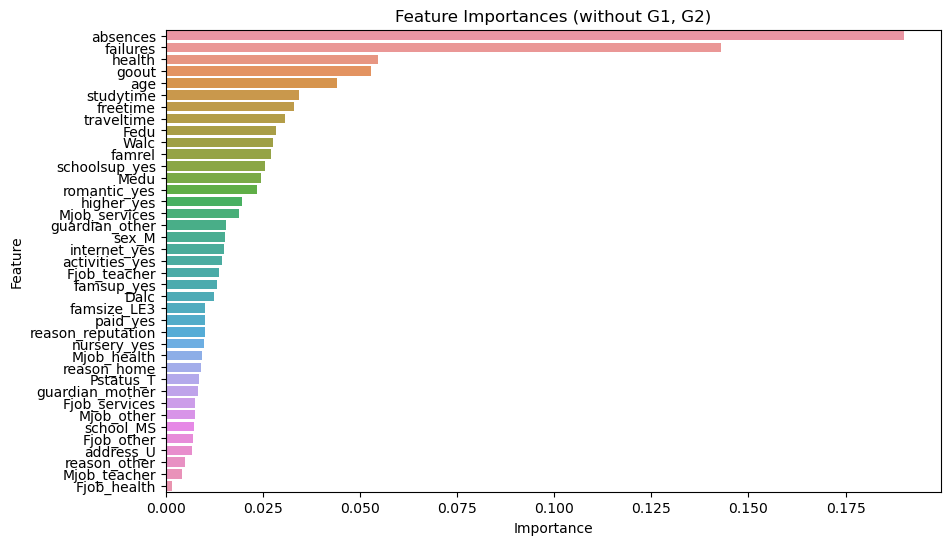

In [25]:
# 특성 중요도 추출
feature_importances_without_G2 = pd.DataFrame({
    'Feature': X2_train.columns,
    'Importance': rf_without_G2.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 중요도 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_without_G2)
plt.title("Feature Importances (without G1, G2)")
plt.show()

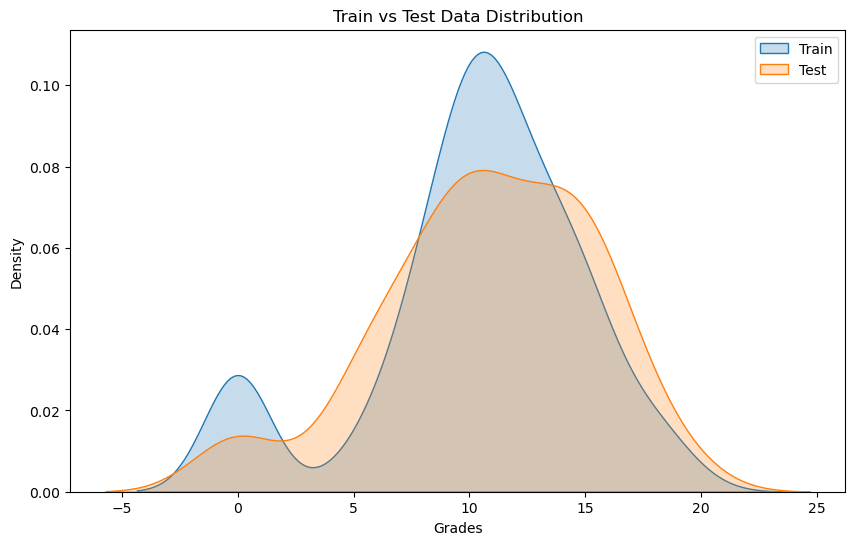

In [26]:
# 학습 및 테스트 데이터 분포 확인 (시각화 6)
plt.figure(figsize=(10, 6))
sns.kdeplot(y_train, label='Train', fill=True)
sns.kdeplot(y_test, label='Test', fill=True)

plt.title('Train vs Test Data Distribution')
plt.xlabel('Grades')
plt.ylabel('Density')
plt.legend()
plt.show()

# Chat GPT 사용

## 프롬프트 1: 상관 관계 히트맵 작성하는 코드가 뭐야?
### 결과: 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터프레임 로드 (예: student-mat.csv 데이터)
### df = pd.read_csv('student-mat.csv', sep=';')

### 상관계수 계산
correlation_matrix = df.corr()

### 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## 프롬프트 2: 랜덤 포레스트 알고리즘을 이용해 학생 성적 예측을 진행하려 하는데 g2 직전학기의성적과 타겟 변수인 g3(실제 성적)의 상관관계가 너무 높아 의미있는 예측이 어려워. 이를 해결할 수 있는 방법 5개 정도 추천해줘

### 결과:
1. G2 변수 제거
2. G2 값을 축소 (Normalization or Scaling)
3. G2를 파생 변수로 변환
4. 특성 중요도 기반 차원 축소
5. 교차 검증을 통한 모델 평가 강화


## 프롬프트 3: 위에 있는 방법 사용했지만 이번에도 G2의 영향이 너무 커. 다른 방법이 없을까?

### 결과: 
1. G2의 가중치 축소
2. G2의 중요도를 제한하는 페널티 적용
3. G2를 축소하여 모델 입력값 조정
4. 특성 조합 확장 및 새로운 변수 생성


[Chat Gpt 사용](https://chatgpt.com/share/6759cd87-9374-8012-a30c-2f703b0841ad)
